In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [145]:
df = pd.read_csv("C:/Users/HP/Desktop/MIXED DATA/DATA/DataSet/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [157]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [159]:
df1.head

<bound method NDFrame.head of      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseA

In [161]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [163]:
x = df1.drop('FastingBS', axis=1)
y = df1['FastingBS']
print(x,y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  RestingECG  MaxHR  \
0     40    1              1        140          289           1    172   
1     49    0              2        160          180           1    156   
2     37    1              1        130          283           2     98   
3     48    0              0        138          214           1    108   
4     54    1              2        150          195           1    122   
..   ...  ...            ...        ...          ...         ...    ...   
913   45    1              3        110          264           1    132   
914   68    1              0        144          193           1    141   
915   57    1              0        130          131           1    115   
916   57    0              1        130          236           0    174   
917   38    1              2        138          175           1    173   

     ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0                 0      0.0         2      

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train,x_test,y_train,y_test)


     Age  Sex  ChestPainType  RestingBP  Cholesterol  RestingECG  MaxHR  \
795   42    1              2        120          240           1    194   
25    36    1              2        130          209           1    178   
84    56    1              0        150          213           1    125   
10    37    0              2        130          211           1    142   
344   51    1              0        120            0           1    104   
..   ...  ...            ...        ...          ...         ...    ...   
106   48    0              0        120          254           2    110   
270   45    1              0        120          225           1    140   
860   60    1              0        130          253           1    144   
435   60    1              0        152            0           2    118   
102   40    0              0        150          392           1    130   

     ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
795               0      0.8         0      

In [171]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train,x_test)

[[-1.24506731  0.54060477  1.31674291 ... -0.09706109 -2.25746543
  -1.09736239]
 [-1.8862362   0.54060477  1.31674291 ... -0.83628643  1.07985506
  -1.09736239]
 [ 0.25099346  0.54060477 -0.80974619 ...  0.08774524 -0.58880518
   0.911276  ]
 ...
 [ 0.67843939  0.54060477 -0.80974619 ...  0.45735791  1.07985506
   0.911276  ]
 [ 0.67843939  0.54060477 -0.80974619 ... -0.83628643  1.07985506
  -1.09736239]
 [-1.45879027 -1.84978019 -0.80974619 ...  1.01177691 -0.58880518
   0.911276  ]] [[ 0.99902384 -1.84978019  0.25349836 ... -0.83628643  1.07985506
  -1.09736239]
 [-0.06959099  0.54060477  1.31674291 ... -0.83628643 -0.58880518
   0.911276  ]
 [ 1.2127468   0.54060477 -0.80974619 ...  0.27255158 -0.58880518
   0.911276  ]
 ...
 [ 1.10588532  0.54060477 -0.80974619 ...  0.54976108 -0.58880518
   0.911276  ]
 [-0.49703693  0.54060477  0.25349836 ... -0.28186743  1.07985506
  -1.09736239]
 [ 1.10588532  0.54060477 -0.80974619 ...  0.08774524 -0.58880518
   0.911276  ]]


In [175]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [179]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6394 - loss: 0.6358 - val_accuracy: 0.7703 - val_loss: 0.5227
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7727 - loss: 0.5037 - val_accuracy: 0.7973 - val_loss: 0.4663
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7833 - loss: 0.4793 - val_accuracy: 0.7973 - val_loss: 0.4418
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7833 - loss: 0.4669 - val_accuracy: 0.7973 - val_loss: 0.4260
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7909 - loss: 0.4566 - val_accuracy: 0.8243 - val_loss: 0.4126
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7879 - loss: 0.4496 - val_accuracy: 0.8243 - val_loss: 0.4060
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8030 - loss: 0.4409 - val_accuracy: 0.8243 - val_loss: 0.3989
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8106 - loss: 0.4347 - val_accuracy: 0.7973 - v

In [183]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7283 - loss: 0.7425
Test Accuracy: 0.7283


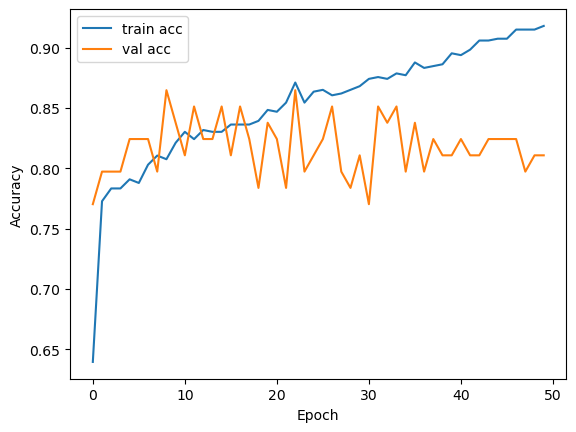

In [185]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()